In [1]:
import ROOT

Welcome to JupyROOT 6.22/02


Warning in <TClass::Init>: no dictionary for class detectorParams is available
Error in <TClass::Load>: dictionary of class detector not found
Error in <TClass::Load>: dictionary of class detector not found
Error in <TExMap::Remove>: key 152413 not found at 4
Warning in <TBufferFile::CheckObject>: reference to unavailable class TObject, pointers of this type will be 0
Info in <TCanvas::Print>: pdf file report/SNRDistribution.pdf has been created


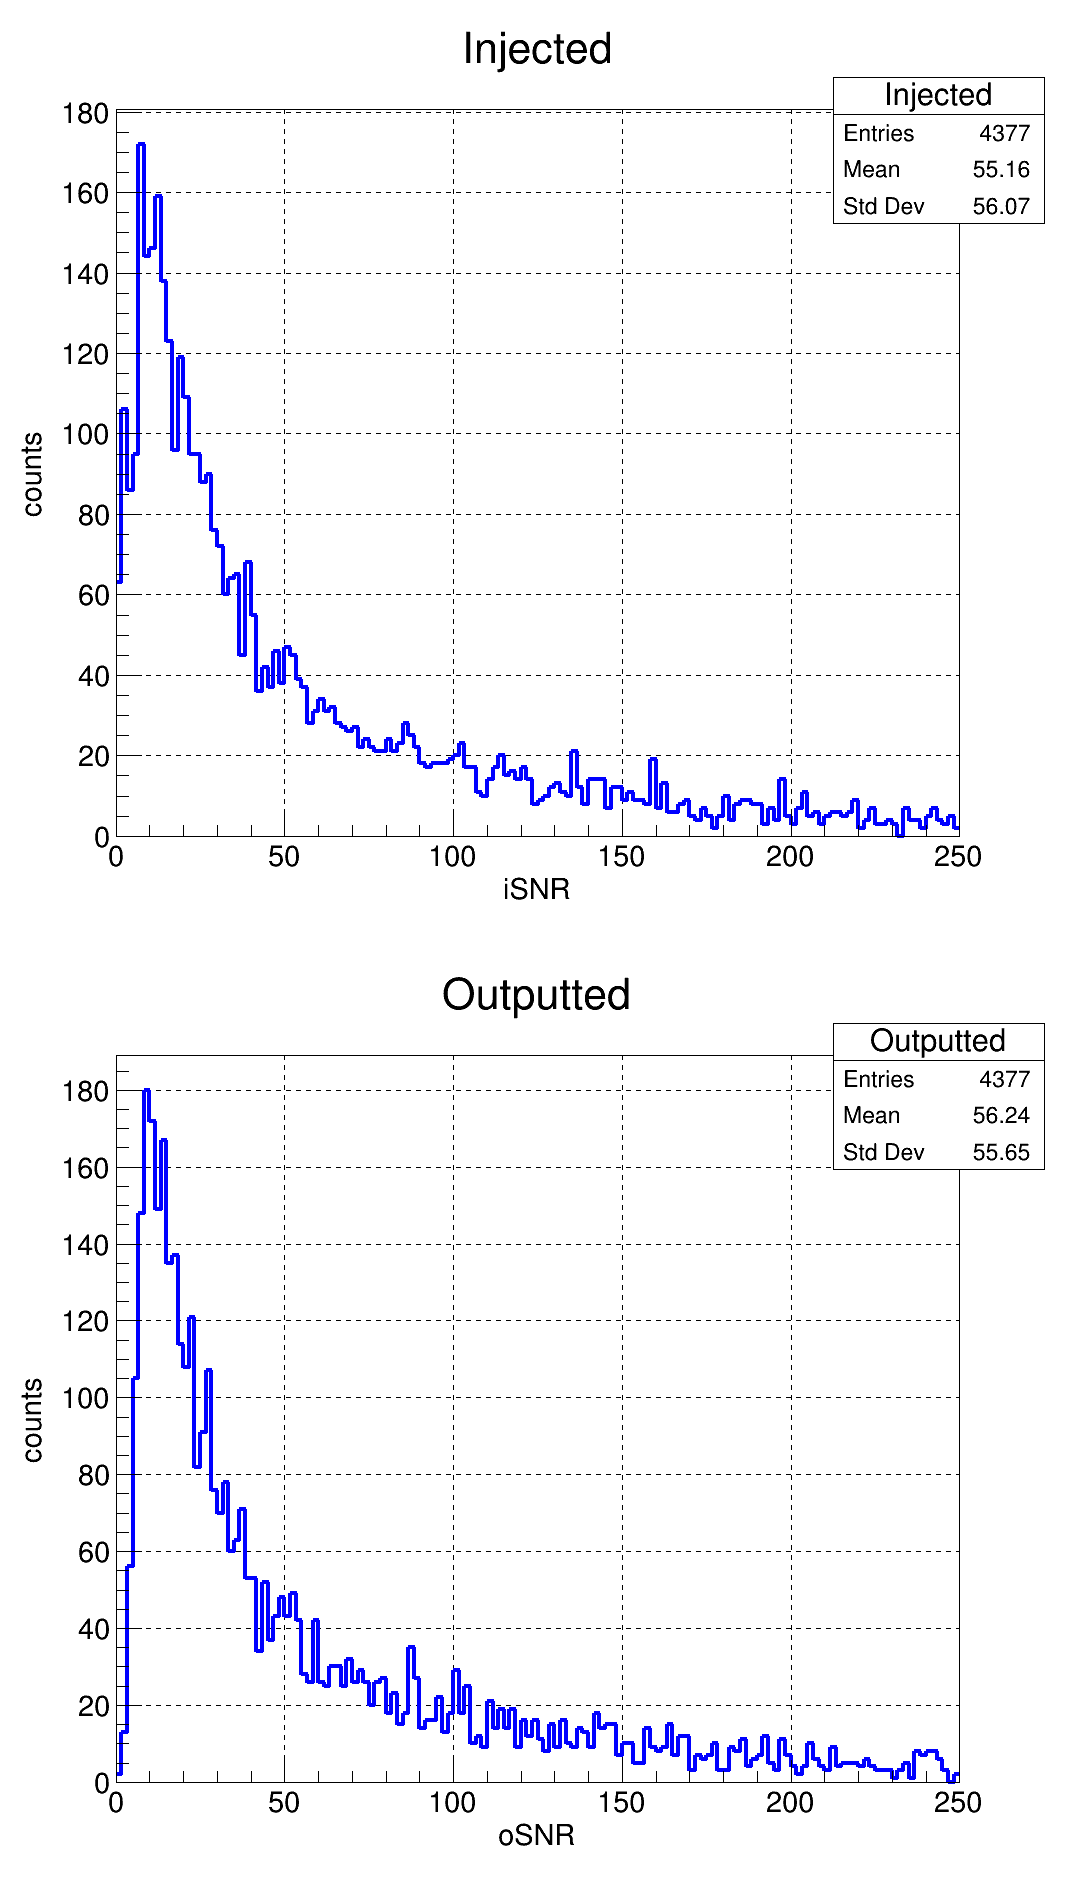

In [2]:
%%cpp

#include <string>
#include <vector>
gStyle -> SetOptStat(1111);
TString path     = "/home/aidin/Documenti/Tesi/analisi/frequenze/";
TString namefile = "wave_O4I_GN_LHV_SIM_PMNS_SHT2_0spin1_cl.M1.root";

TString merge_file_name = path + namefile;
TString       path_save = path + "report/dump";

TFile*  filemerge = new TFile( merge_file_name.Data(), "update" );
TTree* merge_tree =   ( TTree* )    filemerge->Get( "waveburst" );

int nBinD = 150;
float iSNR, oSNR;

merge_tree->SetBranchAddress(   "iSNR", &iSNR   );
merge_tree->SetBranchAddress(   "oSNR", &oSNR   );

TH1F* ViSNR = new TH1F( "Injected", "Injected", nBinD, 0, 250 );

int entr = merge_tree->GetEntries();
for( int i = 0; i < entr; ++i ){
    merge_tree->GetEntry( i );
    ViSNR->Fill( sqrt(iSNR) );
}

TH1F* VoSNR = new TH1F( "Outputted", "Outputted", nBinD, 0, 250 );

for( int i = 0; i < entr; ++i ){
    merge_tree->GetEntry( i );
    VoSNR->Fill( sqrt(oSNR) );
}

TCanvas  *ct9 = new TCanvas( "ct9", "ct9", 1080, 1920 );
ct9->Divide(1,2);
ct9->cd(1);
gPad->SetGrid();
gStyle->SetGridStyle(7);
gStyle->SetGridWidth(1);

ViSNR->Draw("SAME");
ViSNR->SetLineWidth(4);
ViSNR->SetLineColor(kBlue);
ViSNR->            SetTitle( "Injected" );
ViSNR->GetXaxis()->SetTitle(   "iSNR"   );
ViSNR->GetYaxis()->SetTitle(  "counts"  );
ViSNR->GetXaxis()->CenterTitle();
ViSNR->GetYaxis()->CenterTitle();    

ct9->cd(2);
gPad->SetGrid();
gStyle->SetGridStyle(7);
gStyle->SetGridWidth(1);
VoSNR->Draw("SAME");
VoSNR->SetLineWidth(4);
VoSNR->SetLineColor(kBlue);
VoSNR->            SetTitle( "Outputted" );
VoSNR->GetXaxis()->SetTitle(   "oSNR"    );
VoSNR->GetYaxis()->SetTitle(  "counts"   );
VoSNR->GetXaxis()->CenterTitle();
VoSNR->GetYaxis()->CenterTitle();    


ct9->Draw();
ct9->Print(("report/SNRDistribution.pdf"));

Error in <TClass::Load>: dictionary of class detector not found
Error in <TClass::Load>: dictionary of class detector not found
Error in <TExMap::Remove>: key 152413 not found at 4
Warning in <TBufferFile::CheckObject>: reference to unavailable class TObject, pointers of this type will be 0
Warning in <TFile::Append>: Replacing existing TH1: distance1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: distance2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: distance3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: distance4 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: distance5 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: ct9
Info in <TCanvas::Print>: pdf file report/SNRDistributionFactors.pdf has been created


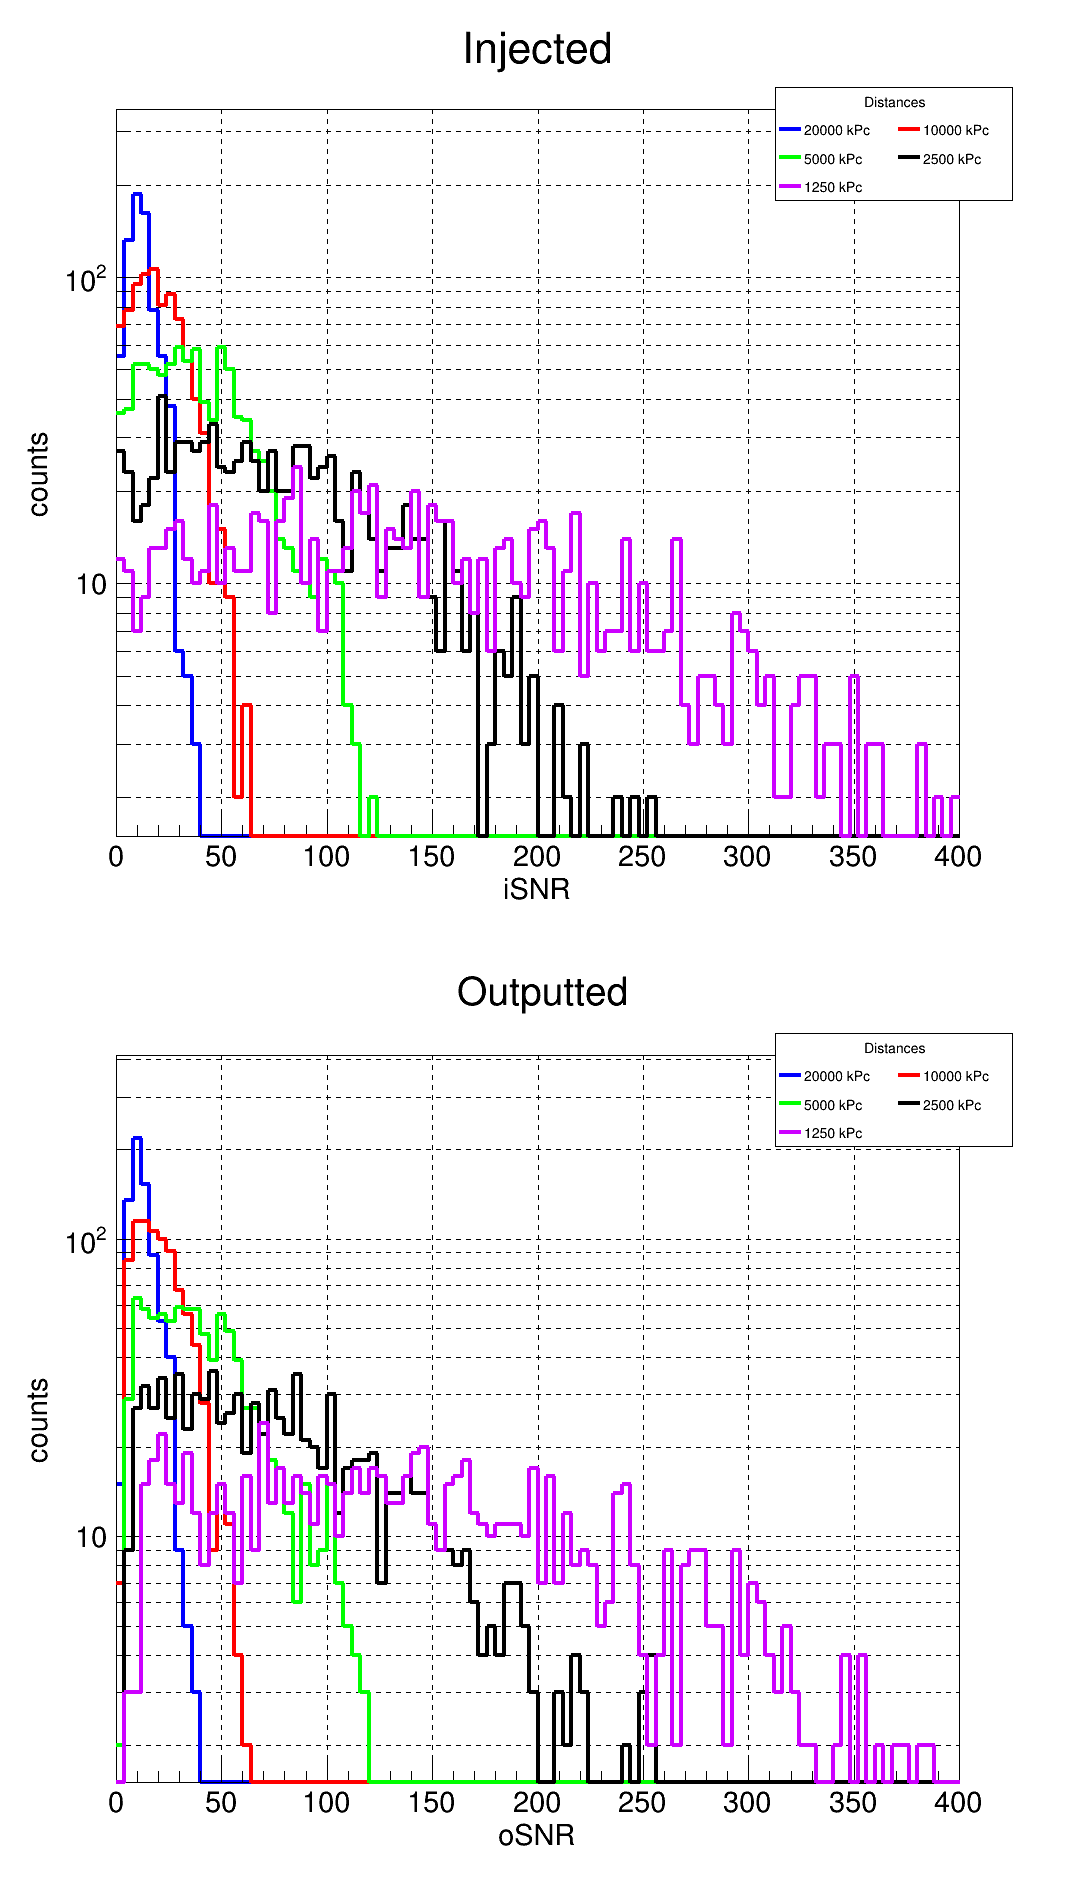

In [3]:
%%cpp

#include <string>
#include <vector>

TString path     = "/home/aidin/Documenti/Tesi/analisi/frequenze/";
TString namefile = "wave_O4I_GN_LHV_SIM_PMNS_SHT2_0spin1_cl.M1.root";

TString merge_file_name = path + namefile;
TString       path_save = path + "report/dump";

TFile*  filemerge = new TFile( merge_file_name.Data(), "update" );
TTree* merge_tree =   ( TTree* )    filemerge->Get( "waveburst" );

int numDistances = 5;
int nBinD = 100;
float factor, oSNR;
const char* hName;
std::string histname;
std::string d[5] = { "20000", "10000", "5000", "2500", "1250" };

merge_tree->SetBranchAddress( "factor", &factor );
merge_tree->SetBranchAddress(   "oSNR", &oSNR   );
merge_tree->SetBranchAddress(   "iSNR", &iSNR   );

std::vector <TH1F*> VoSNR;
VoSNR.reserve( numDistances );
for( int i = 0; i < numDistances; ++i ){
    histname = "distance" + std::to_string(i+1);
    hName = histname.c_str();
    VoSNR.push_back(new TH1F( hName, hName, nBinD, 0, 400 ));
}

for( int i = 0; i < entr; ++i ){
    merge_tree->GetEntry( i );
    for( int j = 1; j < 6; ++j )
        if( factor == j )
            VoSNR[j-1]->Fill( sqrt(oSNR) );
}

std::vector <TH1F*> ViSNR;
ViSNR.reserve( numDistances );
for( int i = 0; i < numDistances; ++i ){
    histname = "distance" + std::to_string(i+1);
    hName = histname.c_str();
    ViSNR.push_back(new TH1F( hName, hName, nBinD, 0, 400 ));
}

int entr = merge_tree->GetEntries();
for( int i = 0; i < entr; ++i ){
    merge_tree->GetEntry( i );
    for( int j = 1; j < 6; ++j )
        if( factor == j )
            ViSNR[j-1]->Fill( sqrt(iSNR) );
}

TCanvas  *ct9 = new TCanvas( "ct9", "ct9", 1080, 1920 );
ct9->Divide(1,2);
ct9->cd(1);
gPad->SetGrid();
for( int i = 1; i < 6; ++i ){
    ViSNR[i-1]->Draw("SAME");
    ViSNR[i-1]->SetLineWidth(4);
}

ViSNR[0]->SetLineColor(kBlue);
ViSNR[1]->SetLineColor(kRed);
ViSNR[2]->SetLineColor(kGreen);
ViSNR[3]->SetLineColor(kBlack);
ViSNR[4]->SetLineColor(kViolet);

ViSNR[0]->            SetTitle( "Injected" );
ViSNR[0]->GetXaxis()->SetTitle(   "iSNR"   );
ViSNR[0]->GetYaxis()->SetTitle(  "counts"  );

ViSNR[0]->GetXaxis()->CenterTitle();
ViSNR[0]->GetYaxis()->CenterTitle();    
    
TLegend *legendiSNR = new TLegend(0.725,0.8,0.95,0.925);
legendiSNR->SetHeader("Distances", "C");
legendiSNR->SetNColumns(2);

const char* legNameiSNR;
string lNameiSNR;
for( int i = 0; i < numDistances; ++i ){
    lNameiSNR   = d[i] + " kPc";
    legNameiSNR = lNameiSNR.c_str();
    legendiSNR->AddEntry( ViSNR[i], legNameiSNR, "l" );
}

legendiSNR->Draw("SAME");
gStyle->SetGridStyle(7);
gStyle->SetGridWidth(1);
gPad->SetLogy();


ct9->cd(2);
gPad->SetGrid();
for( int i = 1; i < 6; ++i ){
    VoSNR[i-1]->Draw("SAME");
    VoSNR[i-1]->SetLineWidth(4);
}

gStyle -> SetOptStat(0);

VoSNR[0]->SetLineColor(kBlue);
VoSNR[1]->SetLineColor(kRed);
VoSNR[2]->SetLineColor(kGreen);
VoSNR[3]->SetLineColor(kBlack);
VoSNR[4]->SetLineColor(kViolet);

VoSNR[0]->            SetTitle( "Outputted" );
VoSNR[0]->GetXaxis()->SetTitle(   "oSNR"    );
VoSNR[0]->GetYaxis()->SetTitle(  "counts"   );

VoSNR[0]->GetXaxis()->CenterTitle();
VoSNR[0]->GetYaxis()->CenterTitle();    
    
TLegend *legendoSNR = new TLegend(0.725,0.8,0.95,0.925);
legendoSNR->SetHeader("Distances", "C");
legendoSNR->SetNColumns(2);


const char* legNameoSNR;
string lNameoSNR;
for( int i = 0; i < numDistances; ++i ){
    lNameoSNR   = d[i] + " kPc";
    legNameoSNR = lNameoSNR.c_str();
    legendoSNR->AddEntry( VoSNR[i], legNameoSNR, "l" );
}

legendoSNR->Draw("SAME");
gStyle->SetGridStyle(7);
gStyle->SetGridWidth(1);
gPad->SetLogy();
    
ct9->Draw();
ct9->Print(("report/SNRDistributionFactors.pdf"));

Error in <TClass::Load>: dictionary of class detector not found
Error in <TClass::Load>: dictionary of class detector not found
Error in <TExMap::Remove>: key 152413 not found at 4
Warning in <TBufferFile::CheckObject>: reference to unavailable class TObject, pointers of this type will be 0
Warning in <TCanvas::Constructor>: Deleting canvas with same name: ct9
Info in <TCanvas::Print>: pdf file report/overlapDistributionFactor.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: ct10
Info in <TCanvas::Print>: pdf file report/overlapDistribution.pdf has been created


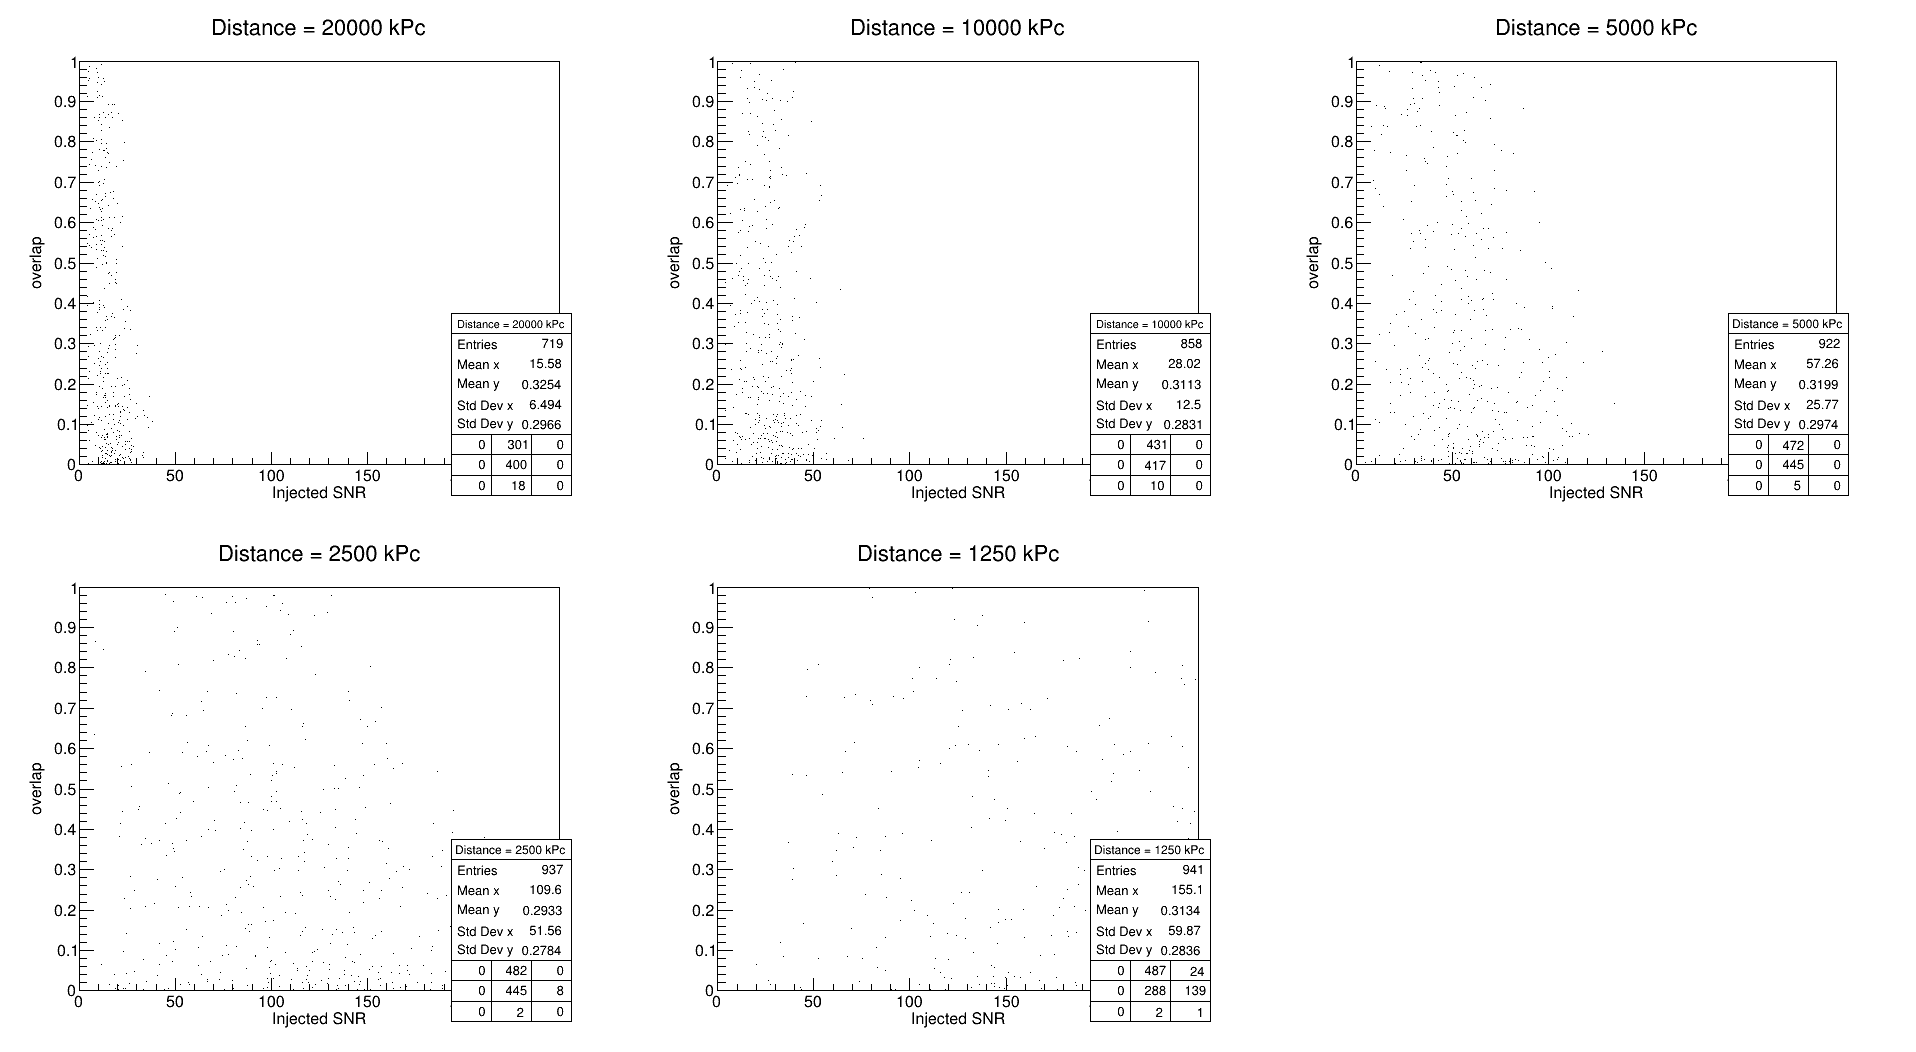

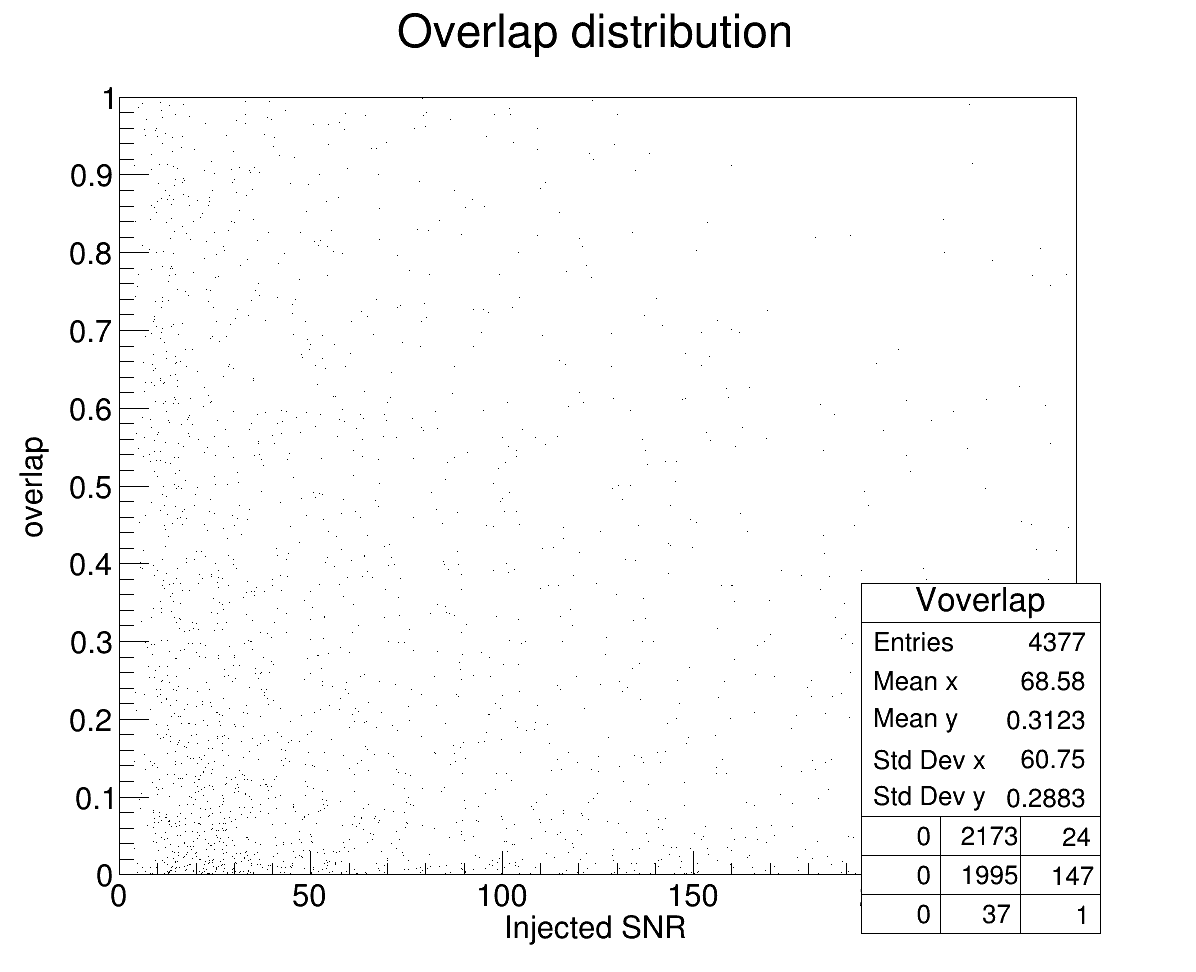

In [5]:
%%cpp

#include <string>
#include <vector>
TString path     = "/home/aidin/Documenti/Tesi/analisi/frequenze/";
TString namefile = "wave_O4I_GN_LHV_SIM_PMNS_SHT2_0spin1_cl.M1.root";

TString merge_file_name = path + namefile;
TString       path_save = path + "report/dump";

TFile*  filemerge = new TFile( merge_file_name.Data(), "update" );
TTree* merge_tree =   ( TTree* )    filemerge->Get( "waveburst" );

int nBinDx = 4*16;
int nBinDy = 4*75;
float iSNR, oSNR;
float ioSNR[3];
const char* hName;
std::string histname;
double time[6];

merge_tree->SetBranchAddress(   "time", &time   );
merge_tree->SetBranchAddress(   "iSNR", &iSNR   );
merge_tree->SetBranchAddress(   "oSNR", &oSNR   );
merge_tree->SetBranchAddress(  "ioSNR", &ioSNR  );
merge_tree->SetBranchAddress( "factor", &factor );

std::vector <TH2F*> VioSNR;
VioSNR.reserve( numDistances );
TH2F* Voverlap = new TH2F( "Voverlap", "Voverlap",
                           nBinDx,  0,        250,
                           nBinDy,  0,          1 );

for( int i = 0; i < numDistances; ++i ){
    histname = "Distance = " +  d[i] + " kPc";
    hName = histname.c_str();
    VioSNR.push_back(new TH2F( hName,   hName, 
                               nBinDx, 0, 250,
                               nBinDy, 0,   1));
}

int entr = merge_tree->GetEntries();
for( int i = 0; i < entr; ++i ){
    merge_tree->GetEntry( i );
    if( abs( time[0] - time[3] ) < 5 ){
        Voverlap->Fill(          sqrt(   iSNR    ),
                        ioSNR[2] /  sqrt( iSNR*oSNR ));
        for( int j = 1; j < 6; ++j )
            if( factor == j )
                VioSNR[j-1]->Fill(         sqrt(   iSNR    ),
                                   ioSNR[2] / sqrt( iSNR*oSNR ));
    }
}

TCanvas  *ct9 = new TCanvas( "ct9", "ct9", 1920, 1080 );
ct9->Divide(3,2);
gStyle->SetGridStyle(7);
gStyle->SetGridWidth(1);
gStyle->SetStatX(0.92);
gStyle->SetStatY(0.4);
gStyle -> SetOptStat(111111);

for( int i = 1; i < 6; ++i ){
    ct9->cd(i);
//    gPad->SetGrid();
    VioSNR[i-1]->SetMarkerSize(10);
    VioSNR[i-1]->Draw("");
}


for(int i = 0; i < numDistances; ++i){
    VioSNR[i]->GetXaxis()->SetTitle( "Injected SNR" );
    VioSNR[i]->GetYaxis()->SetTitle(    "overlap"   );
    VioSNR[i]->GetXaxis()->CenterTitle();
    VioSNR[i]->GetYaxis()->CenterTitle();    
}
ct9->Draw();
ct9->Print(("report/overlapDistributionFactor.pdf"));

TCanvas  *ct10 = new TCanvas( "ct10", "ct10", 1200, 1000 );
ct10->cd();
//gPad->SetGrid();
gStyle->SetGridStyle(7);
gStyle->SetGridWidth(1);
gStyle->SetStatX(0.92);
gStyle->SetStatY(0.4);
Voverlap->Draw("");
Voverlap->SetLineWidth(4);
Voverlap->SetLineColor(kBlue);
Voverlap->            SetTitle( "Overlap distribution" );
Voverlap->GetXaxis()->SetTitle( "Injected SNR" );
Voverlap->GetYaxis()->SetTitle(    "overlap"   );
Voverlap->GetXaxis()->CenterTitle();
Voverlap->GetYaxis()->CenterTitle();    

ct10->Draw();
ct10->Print(("report/overlapDistribution.pdf"));
